In [8]:
### IMPORT PACKAGES
from time import sleep
import numpy as np
from qcodes.dataset import do0d, load_or_create_experiment
from qcodes.instrument import Instrument
from qcodes.instrument_drivers.stanford_research import SR830
from qcodes.validators import Numbers
import time
import matplotlib.pyplot as plt
# lockin.close()
lockin = SR830('lockin', 'GPIB0::1::INSTR')


Connected to: Stanford_Research_Systems SR830 (serial:s/n83931, firmware:ver1.07) in 0.09s


C:\Users\jmborit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch1_databuffer on instrument lockin does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
C:\Users\jmborit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch2_databuffer on instrument lockin does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(


In [9]:
V = 3.5
freq = 100
phi = 0

### SET UP LOCKIN
lockin.reference_source('internal') # set reference to internal 
lockin.set('amplitude', V) # set reference amp
lockin.set('frequency', freq)
lockin.set('phase', phi) 

In [2]:
lockin.print_readable_snapshot()

lockin:
	parameter       value
--------------------------------------------------------------------------------
IDN              :	{'vendor': 'Stanford_Research_Systems', 'model': 'SR830', ...
P                :	None (deg)
R                :	None (V)
R_offset         :	None 
X                :	None (V)
X_offset         :	None 
Y                :	None (V)
Y_offset         :	None 
amplitude        :	None (V)
aux_in1          :	None (V)
aux_in2          :	None (V)
aux_in3          :	None (V)
aux_in4          :	None (V)
aux_out1         :	None (V)
aux_out2         :	None (V)
aux_out3         :	None (V)
aux_out4         :	None (V)
buffer_SR        :	1 (Hz)
buffer_acq_mode  :	None 
buffer_npts      :	None 
buffer_trig_mode :	None 
ch1_databuffer   :	Not available (V)
ch1_datatrace    :	Not available (V)
ch1_display      :	X 
ch1_ratio        :	none 
ch2_databuffer   :	Not available (V)
ch2_datatrace    :	Not available (V)
ch2_display      :	Y 
ch2_ratio        :	none 
complex_voltage  :	None

In [5]:
# for i in range(10):
#     lockin.set('frequency', freq + i * 10)
#     time.sleep(1)

8.39238e-05
0.000110627
9.15532e-05
0.000110627
4.57766e-05
0.000114441
8.77385e-05
0.000110627
4.95913e-05
0.000114441
8.39238e-05
0.000106812
6.8665e-05
0.000114441
9.91826e-05
0.000110627
5.72207e-05
0.000110627
9.15532e-05
0.000110627
5.72207e-05
0.000110627
9.15532e-05
0.000106812
0.000102997
6.8665e-05
0.000114441
8.39238e-05
0.000110627
5.72207e-05
0.000114441
9.15532e-05
0.000110627
7.62944e-05
9.91826e-05
0.000106812
0.000102997
9.53679e-05
8.01091e-05
0.000114441
0.000106812
0.000102997
6.48503e-05
0.000114441
9.53679e-05
0.000114441
3.43325e-05
0.000114441
0.000102997
0.000110627
8.01091e-05
0.000110627
0.000102997
0.000102997
0.000110627
4.95913e-05
0.000110627
8.77385e-05
0.000110627
5.3406e-05
0.000106812
0.000102997
0.000114441
6.10356e-05
0.000102997
9.53679e-05
9.91826e-05
8.77385e-05
9.15532e-05
0.000106812
9.91826e-05
0.000102997
7.62944e-05
0.000122071
9.91826e-05
0.000106812
6.10356e-05
0.000114441
9.91826e-05
0.000110627
4.95913e-05
0.000102997
0.000102997
0.00010

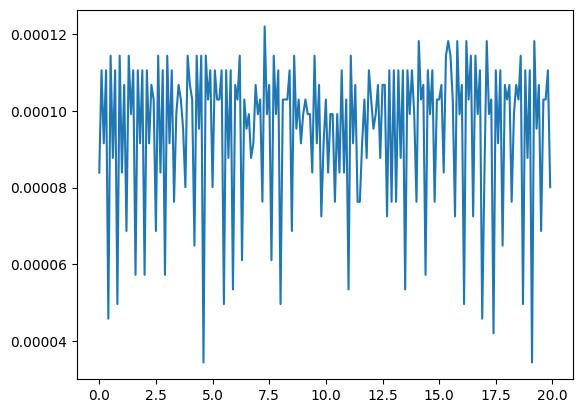

In [12]:
Vs = []
ts = []
dt =0.1
t = 0

while t < 20:
    V = lockin.R()
    print(V)
    Vs.append(V)
    time.sleep(dt)
    ts.append(t)
    t += dt
plt.plot(ts, Vs)